In [1]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(15,8)


# Naiwny klasyfikator Bayesa

Z klasyfikatorem tym zapoznamy się próbując klasyfikować gatunki irysów. Jest to klasyczny już problem, często wykorzystywany przy porównywaniu różnych technik klasyfikacji. Więcej o pochodzeniu tych danych i problemie można przeczytać tu [https://en.wikipedia.org/wiki/Iris_flower_data_set]

Kod napiszemy w oparciu o implementacje klasyfikatora Bayesa z biblioteki <tt>scikit-learn</tt> [http://scikit-learn.org/stable/about.html#citing-scikit-learn]

Zaczerpniemy stamtąd:
* obiekt klasyfikatora <tt>GaussianNB</tt>
* zbiór danych
* funkcje do oceny jakości 

Na razie importujemy:

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

## Zbiór danych irys
Zapoznajemy się z danymi i wybieramy ich podzbiór do dalszej zabawy.

Ładujemy dane

In [3]:
iris = datasets.load_iris() #https://en.wikipedia.org/wiki/Iris_flower_data_set

Zobaczmy co ten zbiór ma w środku:

In [4]:
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


Wypiszemy sobie opis danych:

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Wypiszmy nazwy gatunków:

In [6]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


Wypiszmy nazwy cech:

In [7]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Wypiszmy kodowanie gatunków. To są wyjścia, które chcielibyśmy uzyskać od wytrenowanego klasyfikatora:

In [8]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Wypiszmy wartości cech. Są to dane wejściowe do klasyfkiacji. 

In [9]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Zatem, np. obserwacja nr 5 ma cechy:

In [10]:
print(iris.data[5,:])

[5.4 3.9 1.7 0.4]


i ma przypisaną klasę:

In [11]:
print(iris.target[5])

0


Czyli jest to gatunek:

In [12]:
print(iris.target_names[iris.target[5]])

setosa


## Ilustrowanie własności zbioru danych

Do rysowania zależniści między cechami i klasami przyda nam się własną mapę kolorów:

In [13]:
color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.5, .5, 0)}

Wytwarzamy wektor, który każdemu wierszowi w tabeli danych przypisze kolor odpowiadający gatunkowi irysa

In [14]:
colors = [color_map[y] for y in iris.target]

### Aby przyjrzeć się zbiorowi danych warto zbadać: 
#### 1) Rozkłady cech w klasach: 
* np. histogramy. Proszę wykreślić histogramy rozkładu cech w poszczególnych klasach:

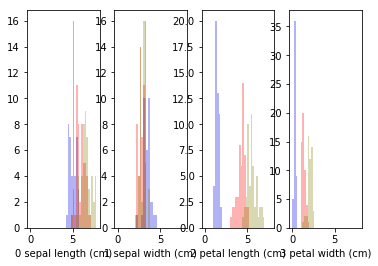

In [15]:
plt.figure()
for f, f_name in enumerate(iris['feature_names']):
    plt.subplot(1,4,f+1)
    for k in range(3): # k - klasa
        plt.hist(iris.data[iris.target==k,f],color=color_map[k],alpha=0.3,bins=np.arange(0,8,0.2))
    plt.xlabel(str(f)+' '+ f_name)
plt.show() 

Violinplot

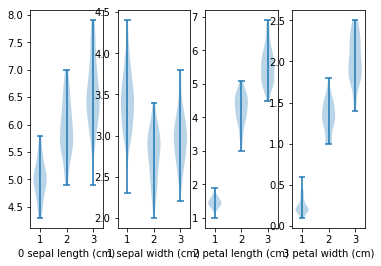

In [16]:
plt.figure()
for f, f_name in enumerate(iris['feature_names']):
    plt.subplot(1,4,f+1)
    data = np.zeros((50,3))
    for k in range(3): #
        data[:,k] = iris.data[iris.target==k,f]      
    plt.violinplot(data)
    plt.xlabel(str(f)+' '+ f_name)
plt.show() 

#### Strukturę korelacji
Tu zwróćmy uwagę na orientację macierzy podawanej do funkcji `np.cov`:

(4, 4)


<Figure size 432x288 with 0 Axes>

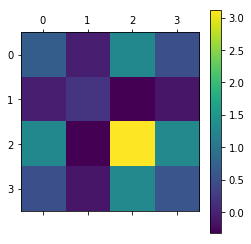

In [17]:
rho = np.cov(iris.data.T)
print(rho.shape)
plt.figure()
plt.matshow(rho)
plt.colorbar()
plt.show()

Stukturę korelacji i rozkłady można też podsumować na takim rysunku:
* w siatce prostokątnej rysujemy 
  * na przekątnej histogramy grupoweane, lub violinploty
  * pod przekątną wykres punktowy (scaterplot)

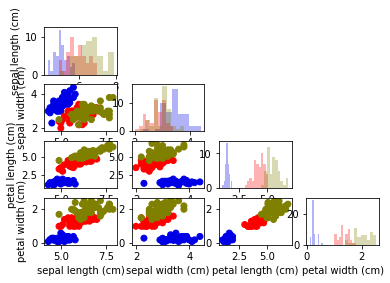

In [18]:
plt.figure(1)
for i, name_i in enumerate(iris['feature_names']):
    for j, name_j in enumerate(iris['feature_names']):
        
        if i>j:
            plt.subplot(4,4,i*4+j+1) # i numeruje wiersze, j kolumny
            plt.scatter(iris.data[:,j],iris.data[:,i],c = colors)
            
        elif i==j:
            plt.subplot(4,4,i*4+j+1) # i numeruje wiersze, j kolumny
            for k in range(3):
                plt.hist(iris.data[iris.target==k,j],color=color_map[k],alpha=0.3)
        if j ==0:
            plt.ylabel(name_i)
        if i ==3:
            plt.xlabel(name_j)
plt.show()

## Szykujemy się do zbudowania klasyfikatora
Aby było nam łatwo ilustrować jego działanie wybieramy dwie cechy (podziały przestrzeni cech da się wtedy łatwo narysować na płaszczyźnie)

* Wybieramy cechy 1 i 2 (bo są ze sobą mało skorelowane) normalizujemy je

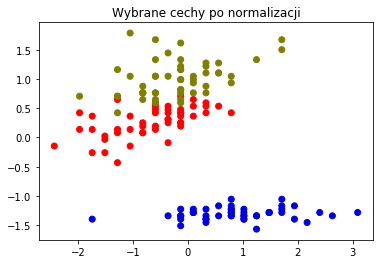

In [19]:
X = np.zeros((iris.data.shape[0],2))
X[:,0] = (iris.data[:,1] - np.mean(iris.data[:,1]))/np.std(iris.data[:,1])
X[:,1] = (iris.data[:,2] - np.mean(iris.data[:,2]))/np.std(iris.data[:,2])  
plt.figure(2)
plt.scatter(X[:,0],X[:,1],c = colors)  
plt.title('Wybrane cechy po normalizacji')
plt.show()

Przyda nam się funkcja do wizualizacji dwuwymiarowych gaussów:

In [20]:
def plot_gauss(mu,sigma,xx,yy):
    ''' Funkcja rysująca kontury funkcji gęstości prawdopodobieństwa 
       dwuwymiarowego rozkładu Gaussa'''

    XX = np.c_[xx.ravel(), yy.ravel()]    
    R = XX - mu 
    invS = np.linalg.inv(np.diag(sigma))
    z = np.zeros(len(R))
    for i in range(len(R)):
        z[i] = np.exp(-0.5*np.dot( R[i,:].T,np.dot(invS,R[i,:])))
    z.shape = xx.shape
    plt.figure()
    plt.contourf(xx,yy,z,alpha = 0.5)
    plt.plot(mu[0],mu[1],'o')
    plt.show()

## Tworzymy i uczymy klasyfikator
Poniżej znajduje się kod służący klasyfikacji. Proszę go uzupełnić zgodnie z komentarzami i dokumentacją:

https://scikit-learn.org/stable/modules/naive_bayes.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() # stwórz instancję klasyfikatora Gaussian Naive Bayes 
gnb.fit(X, iris.target) # dofituj parametry klasyfikatora 
print(gnb.theta_)
print(gnb.sigma_)

[[ 0.85326268 -1.30498732]
 [-0.66143204  0.28532388]
 [-0.19183064  1.01966344]]
[[0.74619175 0.00954805]
 [0.51135882 0.06990787]
 [0.5401009  0.09642893]]


#### Przedstaw rozkłady Gaussa, które zostały dopasowane do danych, skorzystaj z funkcji plot_gauss()
* średnie tych rozkładów są w gnb.theta_
* standardowe odchylenia są w gnb.sigma_

Przygotowanie siatki na której będą rysowane kontury Gaussów

<Figure size 432x288 with 0 Axes>

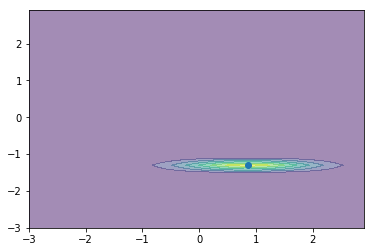

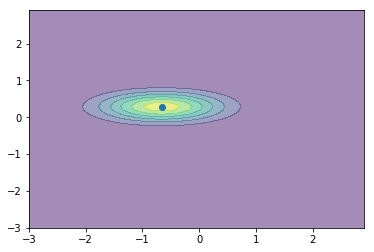

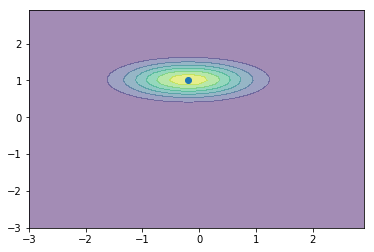

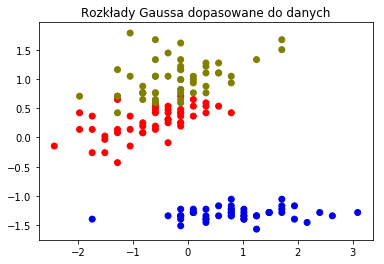

In [22]:
x_min, x_max = -3,3
y_min, y_max = -3,3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
plt.figure(4)
for i in range(3):
    plot_gauss(gnb.theta_[i],gnb.sigma_[i],xx,yy)
# dorzućmy do rysunku jeszcze oryginalne dane
plt.scatter(X[:,0],X[:,1],c = colors)
plt.title(u'Rozkłady Gaussa dopasowane do danych')
plt.show()        

## Rysowanie wyników klasyfikacji             
Przekształcamy siatkę w macierz dwukolumnową - kolumny odpowiadają cechom

In [23]:
XX = np.c_[xx.ravel(), yy.ravel()]       

Dla każdego punktu siatki oblicz predykcję klasyfikatora  

In [24]:
Z = gnb.predict(XX)

Te predykcje narysujemy w przestrzeni cech za pomocą funkcji  plt.contourf 

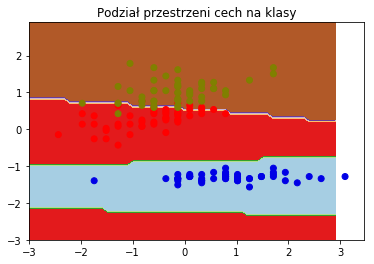

In [25]:
plt.figure(3)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
# i dorzucamy oryginalne punkty
plt.scatter(X[:,0],X[:,1],c = colors)
plt.title(u'Podział przestrzeni cech na klasy')
plt.show()

## Ewaluacja modelu
Teraz zajmiemy się ewaluacją dopasowanego modelu (walidacja krzyżowa). Skorzystamy z funkcji dostrczanych przez [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
* upewnij się, że dokładnie rozumiesz co zwracają te funkcje
* porównaj z definicjami z [wykładu](http://haar.zfb.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_Ocena_jakości_klasyfikacji) 

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

y_true=iris.target
y_pred=gnb.predict(X)
clr=classification_report(y_true,y_pred)
cm=confusion_matrix(y_true,y_pred)
print("classification report:")
print(clr)
print("confusion matrix:")
print(cm)

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.85      0.92      0.88        50
           2       0.91      0.84      0.87        50

   micro avg       0.92      0.92      0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

confusion matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  8 42]]


## Porównanie  modeli
Stwórz trzy modele klasyfikatorów:
* pierwszym niech będzie korzystał z cech 1 i 2 (nasz dotychczasowy model)
* drugim niech korzysta tylko z cech 0 i 1
* trzeci niech korzysta ze wszytkich 4 cech

Porównaj miary jakości tych modeli otrzymywane za pomocą walidacji krzyżowej.

* Trzeci model można też stworzyć dla danych normalizowanych i nienormalizowanych, aby sprzwdzić czy normalizacja w tym przypadku pomaga w prawidłowej klasyfikacji.

In [27]:
def model(X):

    gnb = GaussianNB() # stwórz instancję klasyfikatora Gaussian Naive Bayes 
    gnb.fit(X, iris.target) # dofituj parametry klasyfikatora 
    
    '''
    x_min, x_max = -3,3
    y_min, y_max = -3,3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
    plt.figure(4)
    for i in range(3):
        plot_gauss(gnb.theta_[i],gnb.sigma_[i],xx,yy)
    # dorzućmy do rysunku jeszcze oryginalne dane
    plt.scatter(X[:,0],X[:,1],c = colors)
    plt.title(u'Rozkłady Gaussa dopasowane do danych')
    plt.show()  

    XX = np.c_[xx.ravel(), yy.ravel()]   
    Z = gnb.predict(XX)

    plt.figure(3)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    # i dorzucamy oryginalne punkty
    plt.scatter(X[:,0],X[:,1],c = colors)
    plt.title(u'Podział przestrzeni cech na klasy')
    plt.show()
    '''

    y_true=iris.target
    y_pred=gnb.predict(X)
    clr=classification_report(y_true,y_pred)
    cm=confusion_matrix(y_true,y_pred)
    print("classification report:")
    print(clr)
    print("confusion matrix:")
    print(cm)
    print("##################")

#MODEL 1
X = np.zeros((iris.data.shape[0],2))
X[:,0] = (iris.data[:,1] - np.mean(iris.data[:,1]))/np.std(iris.data[:,1])
X[:,1] = (iris.data[:,2] - np.mean(iris.data[:,2]))/np.std(iris.data[:,2])

print("MODEL 1")
model(X)

#print(X[:5,:])

#MODEL 1 unnormalized
#X = np.zeros((iris.data.shape[0],2))
#X[:,0] = iris.data[:,1]
#X[:,1] = iris.data[:,2]

#print("MODEL 1 bis")
#model(X)

#print(X[:5,:])

#MODEL 2
X = np.zeros((iris.data.shape[0],2))
X[:,0] = (iris.data[:,0] - np.mean(iris.data[:,0]))/np.std(iris.data[:,0])
X[:,1] = (iris.data[:,1] - np.mean(iris.data[:,1]))/np.std(iris.data[:,1])

print("MODEL 2")
model(X)

#print(X[:5,:])

#MODEL 3 unnormalized
X =iris.data

print("MODEL 3 unnormalized")
model(X)

#print(X[:5,:])

#MODEL 3 normalized
X = np.zeros((iris.data.shape[0],4))
X[:,0] = (iris.data[:,0] - np.mean(iris.data[:,0]))/np.std(iris.data[:,0])
X[:,1] = (iris.data[:,1] - np.mean(iris.data[:,1]))/np.std(iris.data[:,1])
X[:,2] = (iris.data[:,2] - np.mean(iris.data[:,2]))/np.std(iris.data[:,2])
X[:,3] = (iris.data[:,3] - np.mean(iris.data[:,3]))/np.std(iris.data[:,3])

print("MODEL 3 normalized")
model(X)

#print(X[:5,:])



MODEL 1
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.85      0.92      0.88        50
           2       0.91      0.84      0.87        50

   micro avg       0.92      0.92      0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

confusion matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  8 42]]
##################
MODEL 2
classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.65      0.74      0.69        50
           2       0.70      0.62      0.66        50

   micro avg       0.78      0.78      0.78       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.78      0.78      0.78       150

confusion matrix:
[[49  1  0]
 [ 0 37 13]
 [ 0 19 31]]
##################
MODEL 3 unnormalized
classif

Wnioski:

Najlepsze miary jakości ma model 3 (wykorzystujący wszystkie cechy). Normalizacja nie wpłynęła na miary jakości. Spośród modeli wykorzystujących dwie cechy znacznie lepszy jest model 1 któremu bliżej jakością do 3 niż do 2. Model 2 dość często myli klasy 2 z 3 - kiepskie miary jakości dla tych klas. Zaobserwowane różnice między modelem 1 i 2 można przewidzieć patrząc na klasy w funkcji dwóch używanych cech (wykresy struktury korelacji) - dla wyboru cech 0 i 1 (model 2) klasy 2 i 3 dość mocno się pokrywają - dla wyboru cech 1 i 2 (model 1) klasy 2 i 3 pokrywają się istotnie słabiej. Klasa 3 jest dobrze odseparowana od pozostałych w obydwu przypadkach.